In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [6]:
king_county_houses = pd.read_csv('/Users/atienojacinta/PYDATA /Pandas_Weekly_projects/capstone/kc_house_data.csv')

In [7]:
king_county_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
pd.options.display.max_columns = 100

In [9]:
king_county_houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


King County is a county located in the U.S.in Washington state.
Population of 2,269,675 as per 2020 census
Has a total area of 2,307 square miles (5,980 km2) - 2,116 square miles (5,480 km2) is land and 191 square miles (490 km2) (8.3%) is water.
Is in Seattle Metropolitan area 
About two-thirds its population lives in Seattle's suburbs
Seattle's suburbs was developed in the late 20th century and early 21st century as bedroom communities before becoming job centers for the technology industry.
The county has 760 lakes and 3,000 miles (4,800 km) of streams and rivers.
King County has been identified as vulnerable to higher risks of flooding caused by climate change due to the number of waterways in the area.

Transportation
Select areas have 
paratransit: providing individualized rides without fixed routes 
vanpools: Carpool on large scale
rideshare: match passengers with drivers

Demographics
### As per 2020 census, there were:
2,269,675 people
917,764 households
969,234 housing units
537,466 families residing in the county
As of 2021, the median home value in King County was $817,547

Racial Make up
56.1% White (54.2% Non-Hispanic White)
6.7% African American (6.5% Non-Hispanic Black)
19.9% Asian (19.8% Non-Hispanic Asian) 
0.9% Pacific Islander (0.8% Non-Hispanic Pacific Islander)
0.5% Native American 
5.2% from other races
10.4% others

DAta is for homes sold between May 2014 and May 2015.

### 2010 Census
1,931,249 people
789,232 households
461,510 families 
912.9 inhabitants per square mile (352.5/km2).
There were 851,261 housing units at an average density of 402.4 per square mile
68.7% White (64.8% Non-Hispanic White)
6.2% African American
14.6% Asian
0.8% Pacific Islander
0.8% Native American
3.9% from other races
5.0% others 

Of the 789,232 households
29.2% had children under the age of 18 living with them
45.3% were married couples living together, 9.1% had a female householder with no husband present
\41.5% were non-families
and 31.0% of all households were made up of individuals. 
The average household size was 2.40 
The average family size was 3.05. 
The median age was 37.1 years


### In 2023, 
the average salary in King County was $120,463 (compared to $87,054 in all of Washington); 

the number of workers in the largest employment sectors of 2023 were
173,135 in government
160,135 in healthcare and social assistance
154,638 in professional, scientific, and technical services
134,548 in information
107,610 in accommodation and food services

link https://en.wikipedia.org/wiki/King_County,_Washington


In [10]:
king_county_houses['date'] = pd.to_datetime(king_county_houses['date'])

In [11]:
king_county_houses['date'].dtype

dtype('<M8[ns]')

In [12]:
king_county_houses['date'].min(), king_county_houses['date'].max()

(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

In [13]:
king_county_houses['yr_sold'] = king_county_houses['date'].dt.year

In [14]:
king_county_houses['month'] = king_county_houses['date'].dt.month_name()

In [15]:
season_map = {
    'December': 'Winter', 
    'January': 'Winter', 
    'February': 'Winter',
    'March': 'Spring', 
    'April': 'Spring',
    'May': 'Spring',
    'June': 'Summer', 
    'July': 'Summer', 
    'August': 'Summer',
    'September': 'Fall', 
    'October': 'Fall', 
    'November': 'Fall'
}

In [16]:
king_county_houses['sale_season'] = king_county_houses['month'].map(season_map)

In [17]:
king_county_houses['day_of_week'] = king_county_houses['date'].dt.day_name()

In [18]:
king_county_houses['day_type'] = king_county_houses['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday','Sunday'] else 'Weekday')

In [19]:
king_county_houses['house_age']  = king_county_houses['yr_sold'] - king_county_houses['yr_built']

In [20]:
king_county_houses['yr_renovated'] = king_county_houses['yr_renovated'].replace(0,np.nan)

In [21]:
king_county_houses['yrs_since_renovation'] = king_county_houses['yr_sold'] - king_county_houses['yr_renovated'].fillna(king_county_houses['yr_built'])

In [22]:
king_county_houses['renovated'] = king_county_houses['yr_renovated'].apply(lambda x: 'Yes' if x > 0 else 'No')

In [23]:
king_county_houses['zipcode'] = king_county_houses['zipcode'].astype(str)

In [24]:
king_county_houses['waterfront'] = king_county_houses['waterfront'].map({0.0: 'No', 1.0: 'Yes'})

In [25]:
king_county_houses['sold_more_than_once'] = king_county_houses['id'].duplicated(keep=False)

In [213]:
king_county_houses['price_per_sqft'] = king_county_houses['price'] / king_county_houses['sqft_living']


In [214]:
king_county_houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,month,sale_season,day_of_week,day_type,house_age,yrs_since_renovation,renovated,sold_more_than_once,price_per_sqft
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,No,0,3,7,1180,0,1955,NaN,98178,47.5112,-122.257,1340,5650,2014,October,Fall,Monday,Weekday,59,59.0,No,False,188.050847
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,No,0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,December,Winter,Tuesday,Weekday,63,23.0,Yes,False,209.338521
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,No,0,3,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015,February,Winter,Wednesday,Weekday,82,82.0,No,False,233.766234
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,No,0,5,7,1050,910,1965,NaN,98136,47.5208,-122.393,1360,5000,2014,December,Winter,Tuesday,Weekday,49,49.0,No,False,308.163265
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,No,0,3,8,1680,0,1987,NaN,98074,47.6168,-122.045,1800,7503,2015,February,Winter,Wednesday,Weekday,28,28.0,No,False,303.571429


In [27]:
king_county_houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold', 'month',
       'sale_season', 'day_of_week', 'day_type', 'house_age',
       'yrs_since_renovation', 'renovated', 'sold_more_than_once'],
      dtype='object')

In [232]:
king_county_houses['view'].unique()

array([0, 3, 4, 2, 1])

In [29]:
len(king_county_houses)

21613

In [30]:
king_county_houses['id'].duplicated().sum()

np.int64(177)

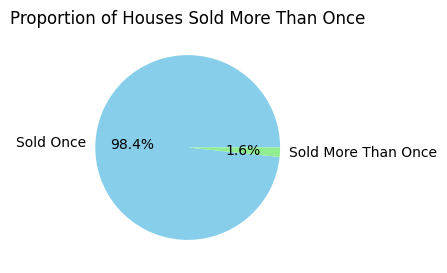

In [31]:
sold_more_than_once = king_county_houses['sold_more_than_once'].value_counts(normalize=True) * 100

plt.figure(figsize=(3,3))
colors = ['skyblue', 'lightgreen']
plt.pie(sold_more_than_once, labels=['Sold Once', 'Sold More Than Once'], autopct='%1.1f%%', colors=colors)
plt.title('Proportion of Houses Sold More Than Once')
plt.show()

In [32]:
king_county_houses1 = king_county_houses.drop_duplicates(subset='id', keep=False)

In [33]:
len(king_county_houses1)

21260

In [34]:
king_county_houses1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21260 entries, 0 to 21612
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    21260 non-null  int64         
 1   date                  21260 non-null  datetime64[ns]
 2   price                 21260 non-null  float64       
 3   bedrooms              21260 non-null  int64         
 4   bathrooms             21260 non-null  float64       
 5   sqft_living           21260 non-null  int64         
 6   sqft_lot              21260 non-null  int64         
 7   floors                21260 non-null  float64       
 8   waterfront            21260 non-null  object        
 9   view                  21260 non-null  int64         
 10  condition             21260 non-null  int64         
 11  grade                 21260 non-null  int64         
 12  sqft_above            21260 non-null  int64         
 13  sqft_basement        

In [35]:
king_county_houses1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,month,sale_season,day_of_week,day_type,house_age,yrs_since_renovation,renovated,sold_more_than_once
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,No,0,3,7,1180,0,1955,NaN,98178,47.5112,-122.257,1340,5650,2014,October,Fall,Monday,Weekday,59,59.0,No,False
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,No,0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,December,Winter,Tuesday,Weekday,63,23.0,Yes,False
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,No,0,3,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015,February,Winter,Wednesday,Weekday,82,82.0,No,False
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,No,0,5,7,1050,910,1965,NaN,98136,47.5208,-122.393,1360,5000,2014,December,Winter,Tuesday,Weekday,49,49.0,No,False
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,No,0,3,8,1680,0,1987,NaN,98074,47.6168,-122.045,1800,7503,2015,February,Winter,Wednesday,Weekday,28,28.0,No,False


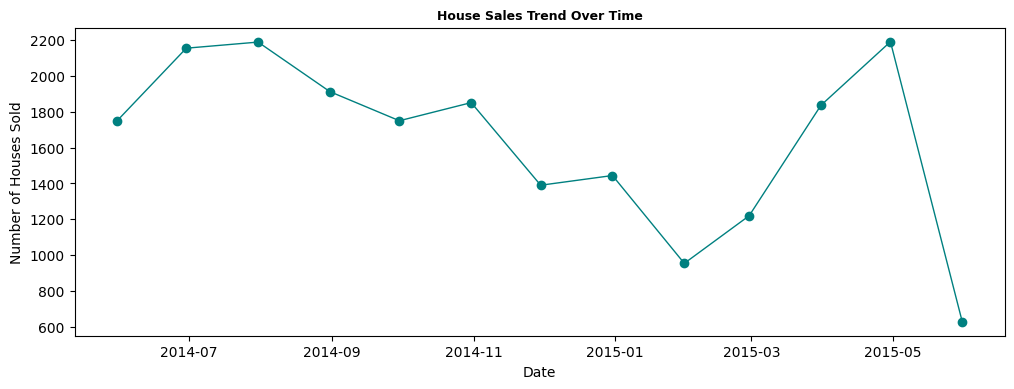

In [36]:
sales_by_month = king_county_houses1.set_index('date').resample('ME')['id'].count()

plt.figure(figsize=(12,4))
plt.plot(sales_by_month.index, sales_by_month.values, color='teal', marker='o', linewidth=1)
plt.title('House Sales Trend Over Time', fontsize=9, weight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Houses Sold')
plt.show()

<Axes: xlabel='price', ylabel='Count'>

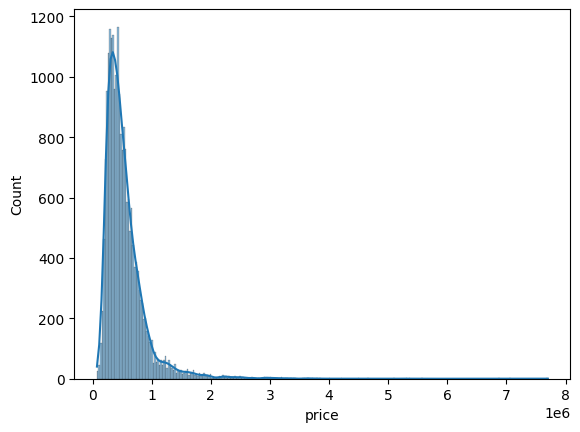

In [216]:
sns.histplot(king_county_houses1['price'], kde=True)


<Axes: xlabel='bedrooms'>

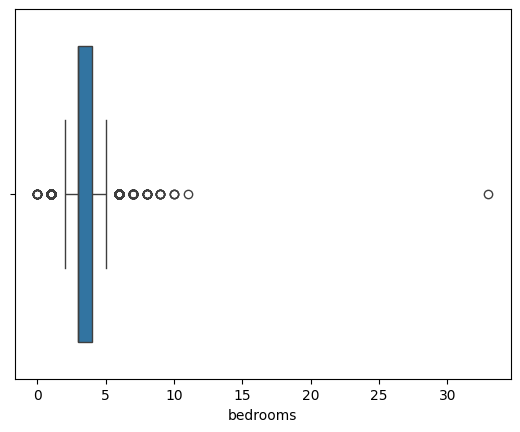

In [217]:
sns.boxplot(x=king_county_houses1['bedrooms'])

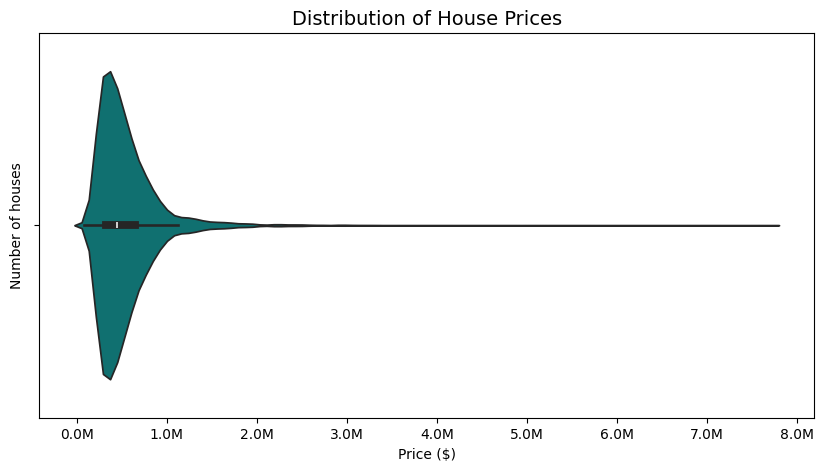

In [55]:
plt.figure(figsize=(10,5))
sns.violinplot(x=king_county_houses1['price'],orient='h',inner='box',color='teal')
plt.title('Distribution of House Prices', fontsize=14)
plt.xlabel('Price ($)')
plt.ylabel('Number of houses')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.show()

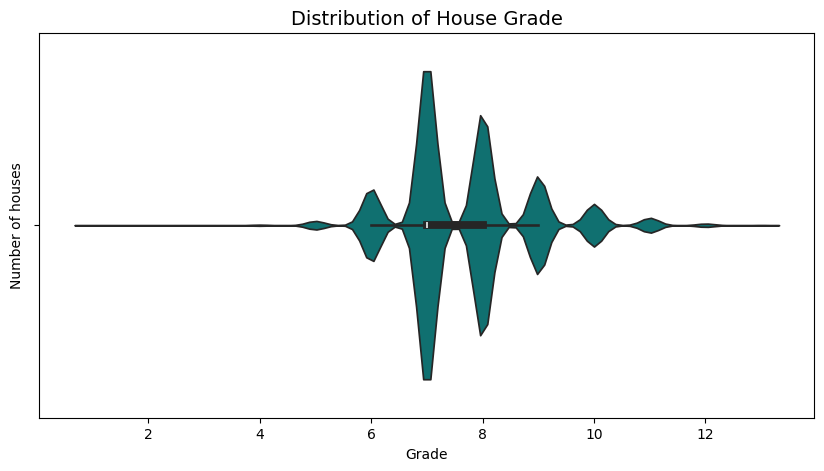

In [38]:
plt.figure(figsize=(10,5))
sns.violinplot(x=king_county_houses1['grade'],orient='h',inner='box',color='teal')
plt.title('Distribution of House Grade', fontsize=14)
plt.xlabel('Grade')
plt.ylabel('Number of houses')
plt.show()

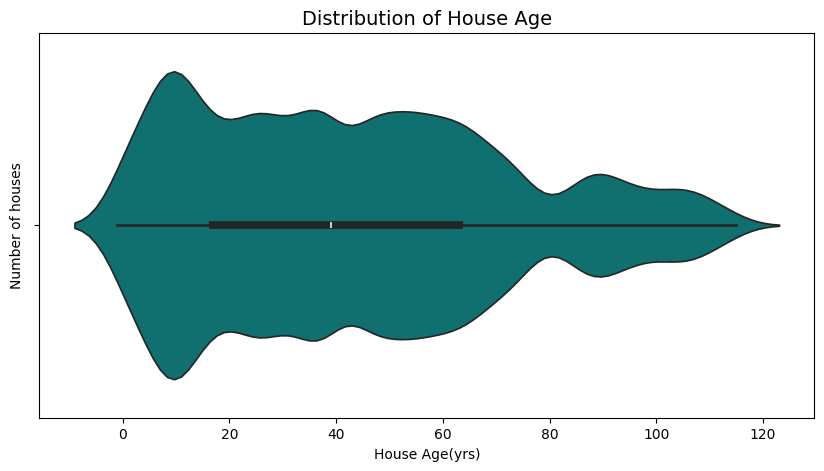

In [39]:
plt.figure(figsize=(10,5))
sns.violinplot(x=king_county_houses1['house_age'],orient='h',inner='box',color='teal')
plt.title('Distribution of House Age', fontsize=14)
plt.xlabel('House Age(yrs)')
plt.ylabel('Number of houses')
plt.show()

### Univariate Analysis
- Data clean up
- Total houses
- Duplicated houses
- Bathrooms/Floors/Location/Bedrooms/Sizes/Waterfront
- Prices
- Yr built/Yr renovated
- Grade/Condition
- Latitude
- Longitude


### Bivariate

- Day of week and sales
- Age and price
- Bedrooms and price.
- Views and price
- Waterfront and price
- Floor and price
- Yr_built and price
- Renovated and price
- Condition and price
- Zipcode and price
- Locations and price
- Sqft and price

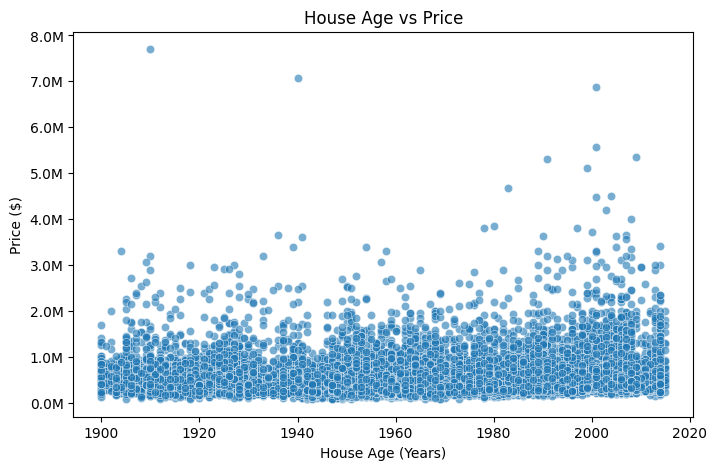

In [54]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=king_county_houses1, x='yr_built', y='price', alpha=0.6)
plt.title('House Age vs Price')
plt.xlabel('House Age (Years)')
plt.ylabel('Price ($)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.show()

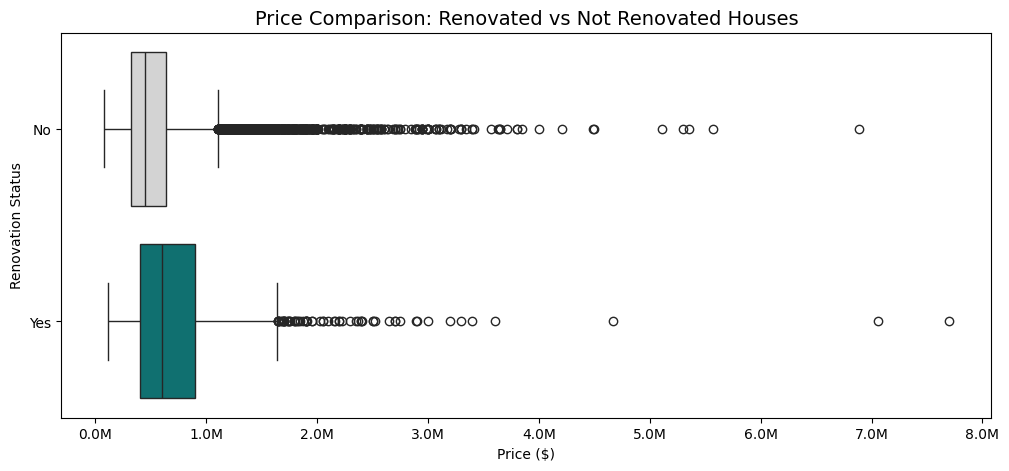

In [53]:
plt.figure(figsize=(12,5))
sns.boxplot(data=king_county_houses1, x='price', y='renovated', hue = 'renovated',palette=['lightgray', 'teal'])

plt.title('Price Comparison: Renovated vs Not Renovated Houses', fontsize=14)
plt.xlabel('Price ($)')
plt.ylabel('Renovation Status')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.show()

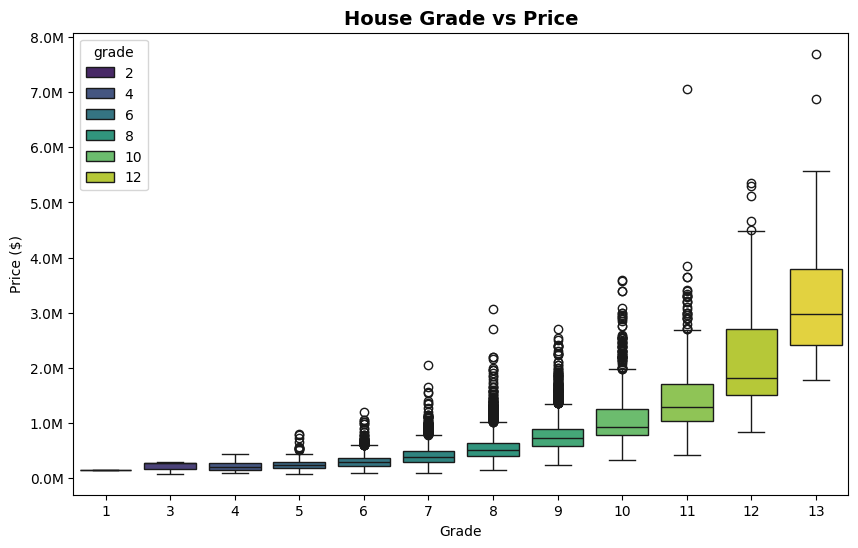

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(data=king_county_houses1, x='grade', y='price', hue='grade', palette='viridis')

plt.title('House Grade vs Price', fontsize=14, weight='bold')
plt.xlabel('Grade')
plt.ylabel('Price ($)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.show()

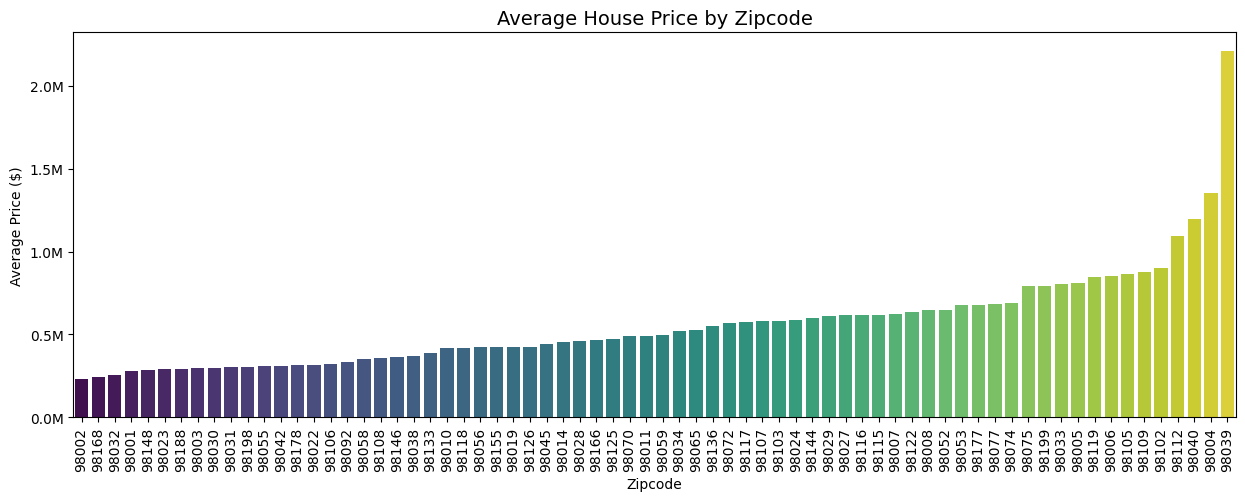

In [51]:
avg_price = king_county_houses1.groupby('zipcode')['price'].mean().sort_values()

plt.figure(figsize=(15,5))
sns.barplot(x=avg_price.index, y=avg_price.values, hue=avg_price.index, palette='viridis',legend=False)
plt.title('Average House Price by Zipcode', fontsize=14)
plt.xlabel('Zipcode')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.show()

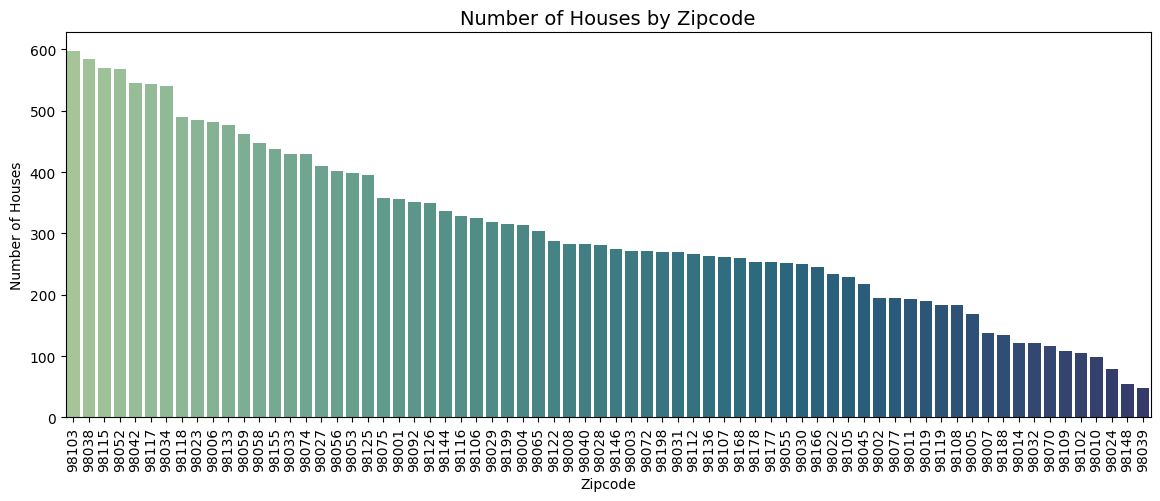

In [81]:
house_count = king_county_houses1.groupby('zipcode')['id'].count().sort_values(ascending=False).reset_index()

# Rename the column for clarity
house_count.rename(columns={'id': 'house_count'}, inplace=True)

# Plot
plt.figure(figsize=(14,5))
sns.barplot(x='zipcode', y='house_count', data=house_count, hue='zipcode', palette='crest')
plt.title('Number of Houses by Zipcode', fontsize=14)
plt.xlabel('Zipcode')
plt.ylabel('Number of Houses')
plt.xticks(rotation=90)
plt.show()

/var/folders/b7/64294z_j16d0t1nszkgct6_c0000gn/T/ipykernel_93370/1397983521.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




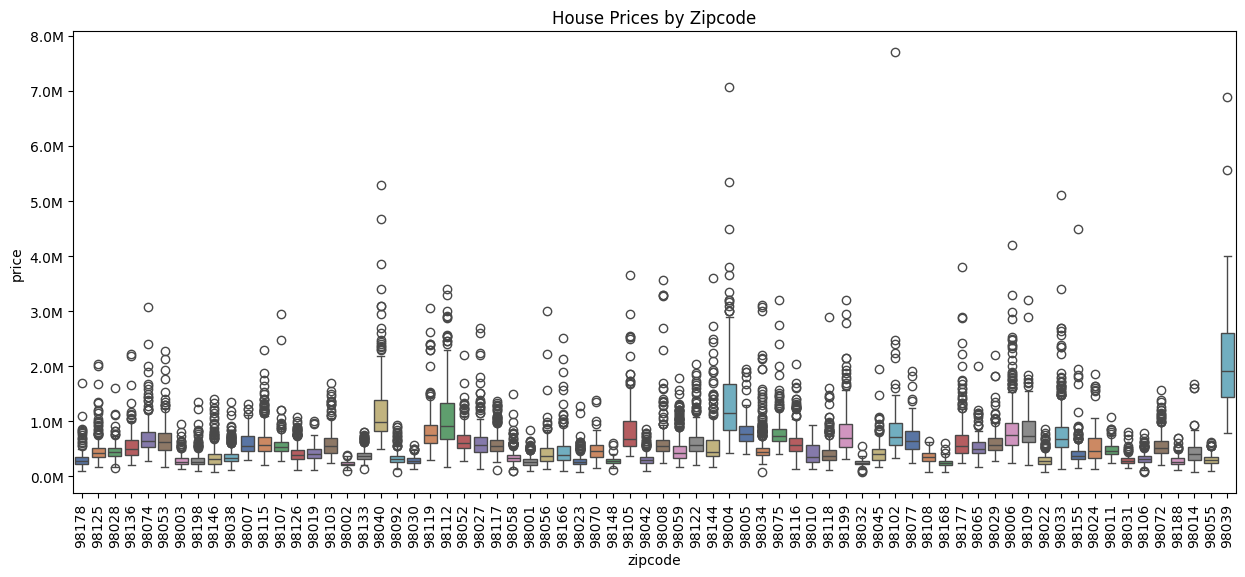

In [108]:
plt.figure(figsize=(15,6))
sns.boxplot(x='zipcode', y='price', palette='deep', data=king_county_houses1)
plt.xticks(rotation=90)
plt.title('House Prices by Zipcode')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.show()

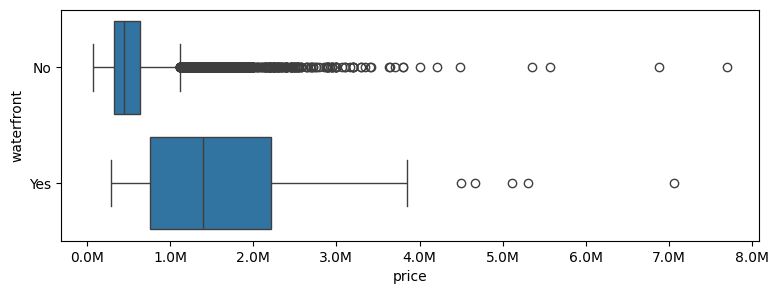

In [117]:
plt.figure(figsize=(9,3))
sns.boxplot(x='price', y='waterfront', data=king_county_houses1)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))



/var/folders/b7/64294z_j16d0t1nszkgct6_c0000gn/T/ipykernel_93370/921001136.py:4: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



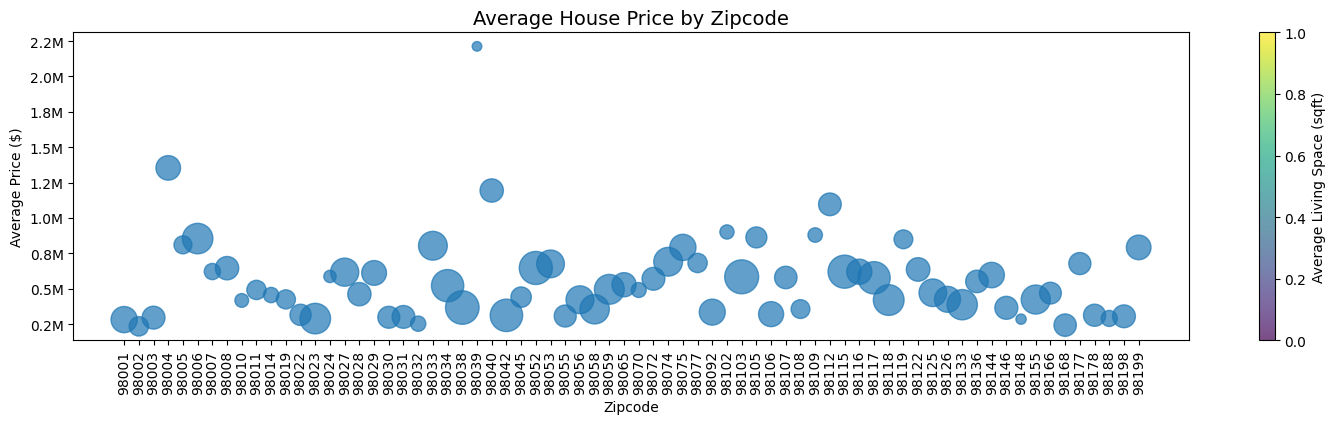

In [138]:
zipcode_summary = (king_county_houses1.groupby('zipcode').agg(avg_price=('price', 'mean'),house_count=('id', 'count'),avg_sqft=('sqft_living', 'mean')).reset_index())

plt.figure(figsize=(18,4))
plt.scatter(
    x=zipcode_summary['zipcode'],
    y=zipcode_summary['avg_price'],
    s=zipcode_summary['house_count'],   
    # c=zipcode_summary['avg_sqft'],         
    cmap='viridis',
    alpha=0.7
)

plt.title('Average House Price by Zipcode', fontsize=14)
plt.xlabel('Zipcode')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.colorbar(label='Average Living Space (sqft)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.show()

In [219]:
top_zipcodes = (king_county_houses1.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(10))
top_zipcodes

zipcode
98039    2.212819e+06
98004    1.354048e+06
98040    1.194230e+06
98112    1.096496e+06
98102    9.012583e+05
98109    8.796236e+05
98105    8.628252e+05
98006    8.546741e+05
98119    8.494480e+05
98005    8.101649e+05
Name: price, dtype: float64

In [165]:
king_county_houses1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold', 'month',
       'sale_season', 'day_of_week', 'day_type', 'house_age',
       'yrs_since_renovation', 'renovated', 'sold_twice_than_once',
       'sold_more_than_once'],
      dtype='object')

In [67]:
zipcode_summary = king_county_houses1.groupby('zipcode')['price'].mean().reset_index()

fig = px.scatter(
    zipcode_summary,
    x='zipcode',
    y='price',
    size='price',
    color='price',
    color_continuous_scale='Viridis',
    title='Average House Price by Zipcode'
)
fig.update_xaxes(type='category')
fig.show()

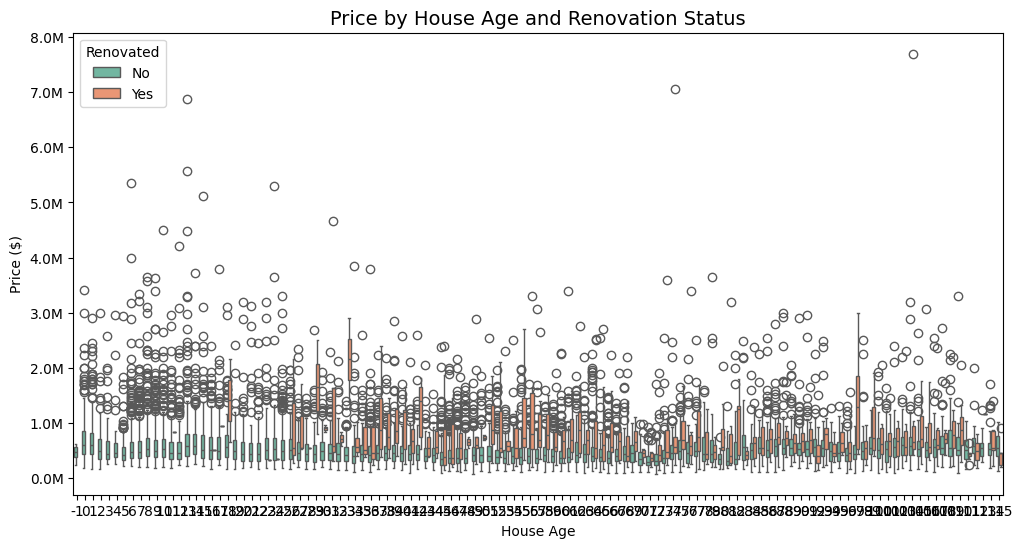

In [227]:
plt.figure(figsize=(12,6))
sns.boxplot(data=king_county_houses1,x='house_age',y='price',hue='renovated',palette=['#66c2a5', '#fc8d62'])
plt.title('Price by House Age and Renovation Status', fontsize=14)
plt.xlabel('House Age')
plt.ylabel('Price ($)')
plt.legend(title='Renovated')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.show()


/var/folders/b7/64294z_j16d0t1nszkgct6_c0000gn/T/ipykernel_93370/2222754269.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/b7/64294z_j16d0t1nszkgct6_c0000gn/T/ipykernel_93370/2222754269.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



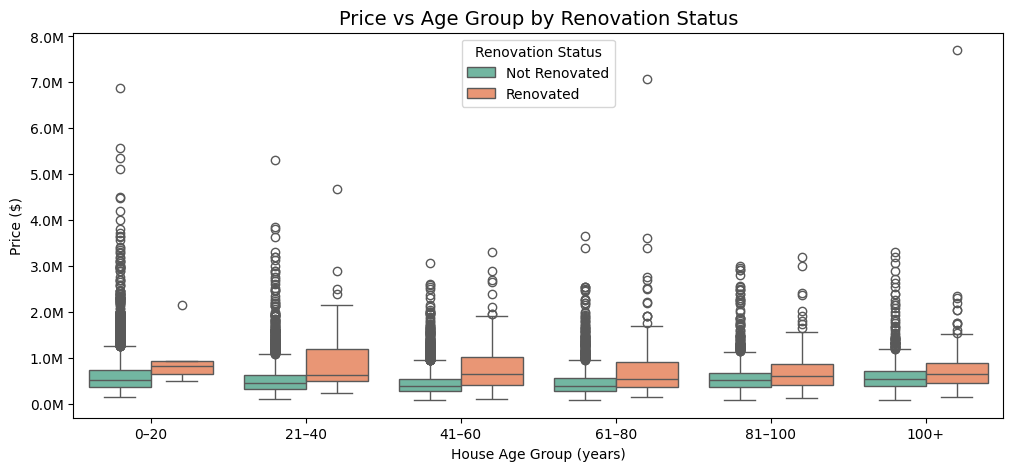

In [228]:
# Create Renovation status
king_county_houses1['is_renovated'] = np.where(king_county_houses1['yr_renovated'] > 0, 'Renovated', 'Not Renovated')

# Create Age Groups (bins)
bins = [0, 20, 40, 60, 80, 100, 150]
labels = ['0–20', '21–40', '41–60', '61–80', '81–100', '100+']
king_county_houses1['age_group'] = pd.cut(king_county_houses1['house_age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12,5))
sns.boxplot(
    data=king_county_houses1,
    x='age_group',
    y='price',
    hue='is_renovated',
    palette='Set2'
)
plt.title('Price vs Age Group by Renovation Status', fontsize=14)
plt.xlabel('House Age Group (years)')
plt.ylabel('Price ($)')
plt.legend(title='Renovation Status')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.show()


### Multivariate

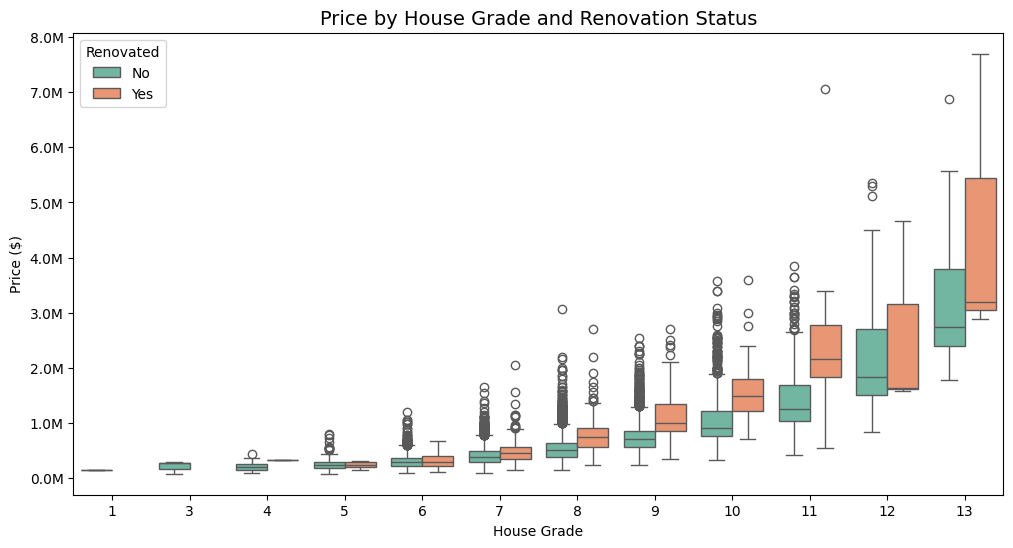

In [153]:
plt.figure(figsize=(12,6))
sns.boxplot(data=king_county_houses1,x='grade',y='price',hue='renovated',palette=['#66c2a5', '#fc8d62'])
plt.title('Price by House Grade and Renovation Status', fontsize=14)
plt.xlabel('House Grade')
plt.ylabel('Price ($)')
plt.legend(title='Renovated')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.show()

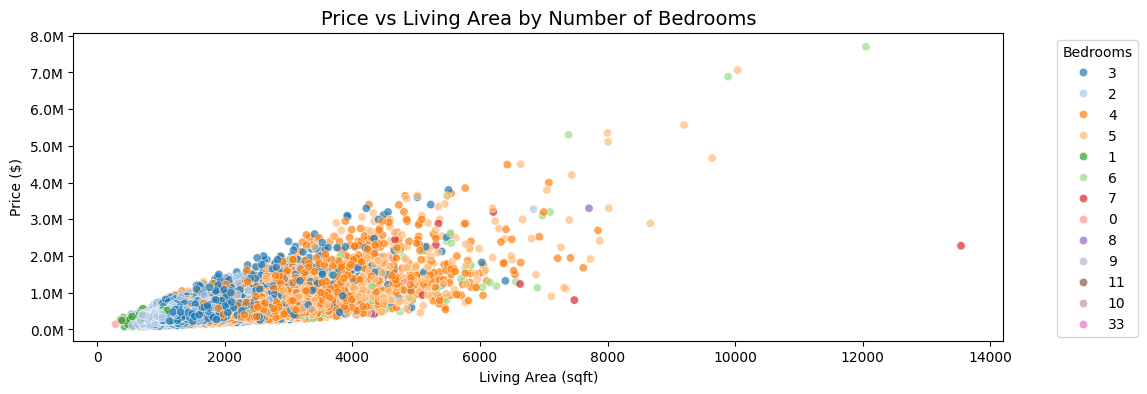

In [176]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=king_county_houses1,x='sqft_living',y='price',hue=king_county_houses1['bedrooms'].astype(str),palette='tab20',alpha=0.7)
plt.title('Price vs Living Area by Number of Bedrooms', fontsize=14)
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price ($)')
plt.legend(title='Bedrooms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.show()

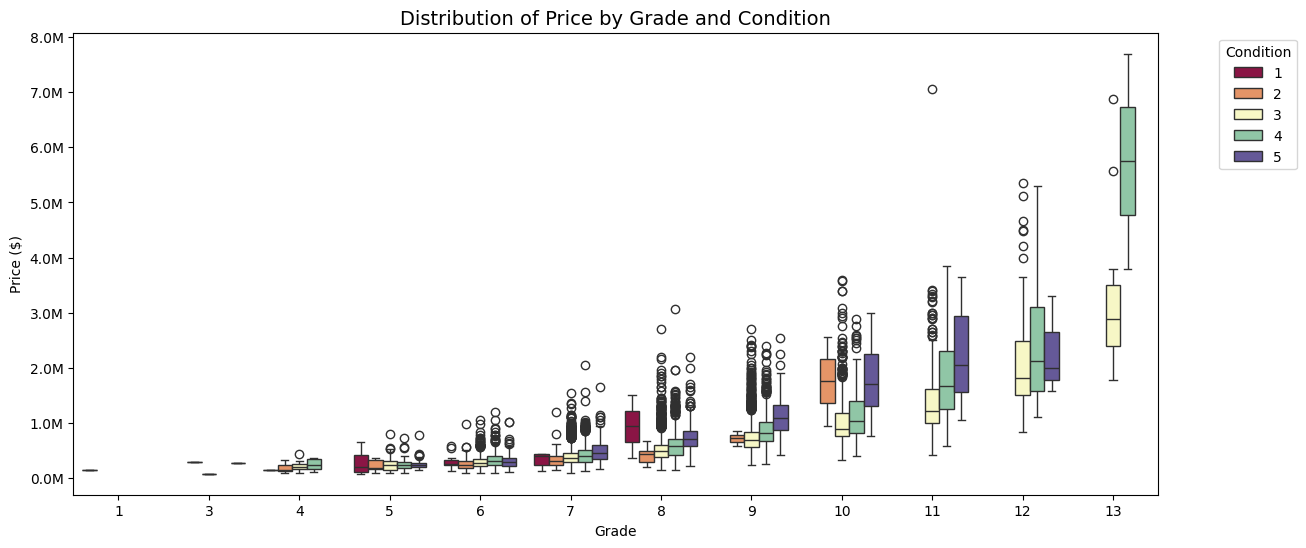

In [178]:
plt.figure(figsize=(14,6))
sns.boxplot(
    data=king_county_houses1,
    x='grade', 
    y='price', 
    hue='condition',
    palette='Spectral'
)
plt.title('Distribution of Price by Grade and Condition', fontsize=14)
plt.xlabel('Grade')
plt.ylabel('Price ($)')
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.show()


/var/folders/b7/64294z_j16d0t1nszkgct6_c0000gn/T/ipykernel_93370/428181702.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/b7/64294z_j16d0t1nszkgct6_c0000gn/T/ipykernel_93370/428181702.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




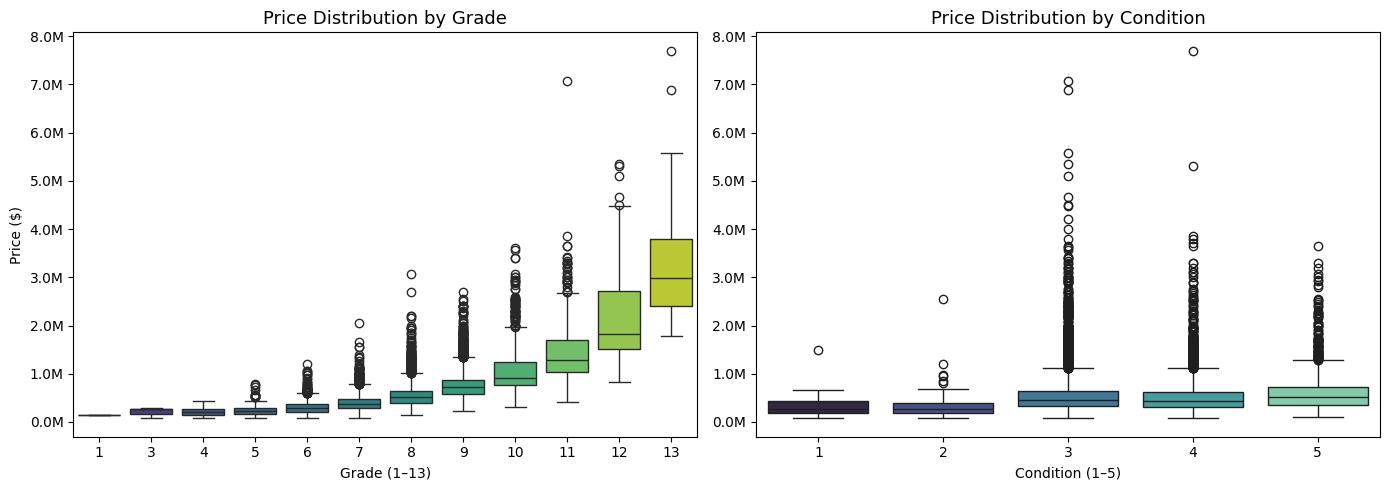

In [223]:
plt.figure(figsize=(14,5))

# --- Chart 1: Price vs Grade ---
plt.subplot(1, 2, 1)
sns.boxplot(data=king_county_houses1, x='grade', y='price', palette='viridis')
plt.title('Price Distribution by Grade', fontsize=13)
plt.xlabel('Grade (1–13)')
plt.ylabel('Price ($)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))

# --- Chart 2: Price vs Condition ---
plt.subplot(1, 2, 2)
sns.boxplot(data=king_county_houses1, x='condition', y='price', palette='mako')
plt.title('Price Distribution by Condition', fontsize=13)
plt.xlabel('Condition (1–5)')
plt.ylabel('')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))

plt.tight_layout()
plt.show()


/var/folders/b7/64294z_j16d0t1nszkgct6_c0000gn/T/ipykernel_93370/3993267478.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/b7/64294z_j16d0t1nszkgct6_c0000gn/T/ipykernel_93370/3993267478.py:11: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



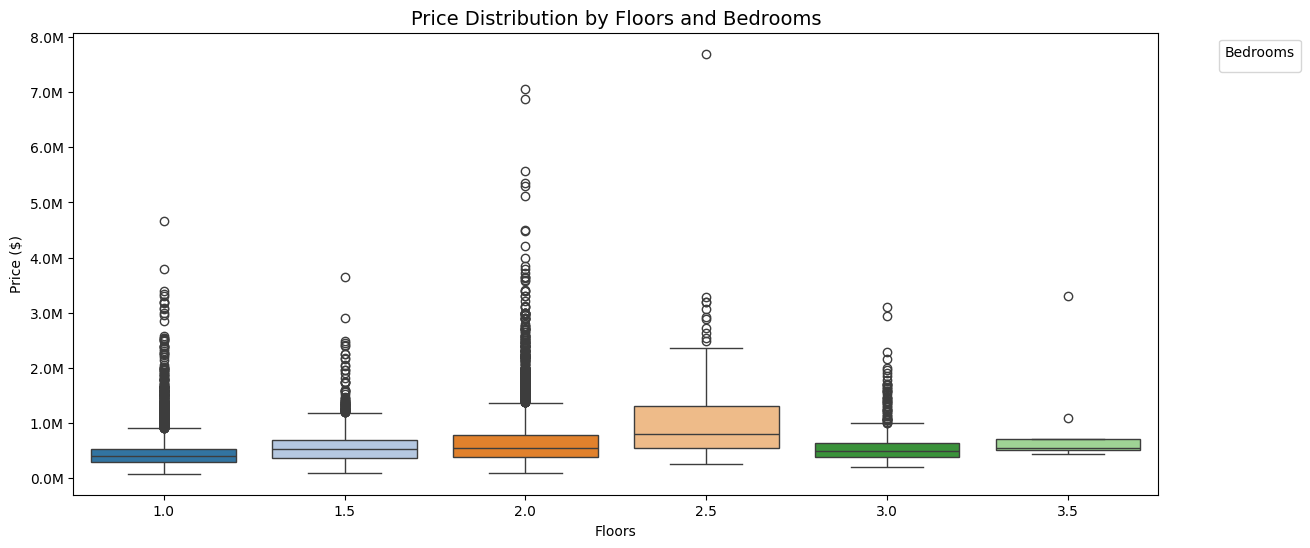

In [229]:
plt.figure(figsize=(14,6))
sns.boxplot(
    data=king_county_houses1,
    x='floors',
    y='price',
    palette='tab20'
)
plt.title('Price Distribution by Floors and Bedrooms', fontsize=14)
plt.xlabel('Floors')
plt.ylabel('Price ($)')
plt.legend(title='Bedrooms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.show()


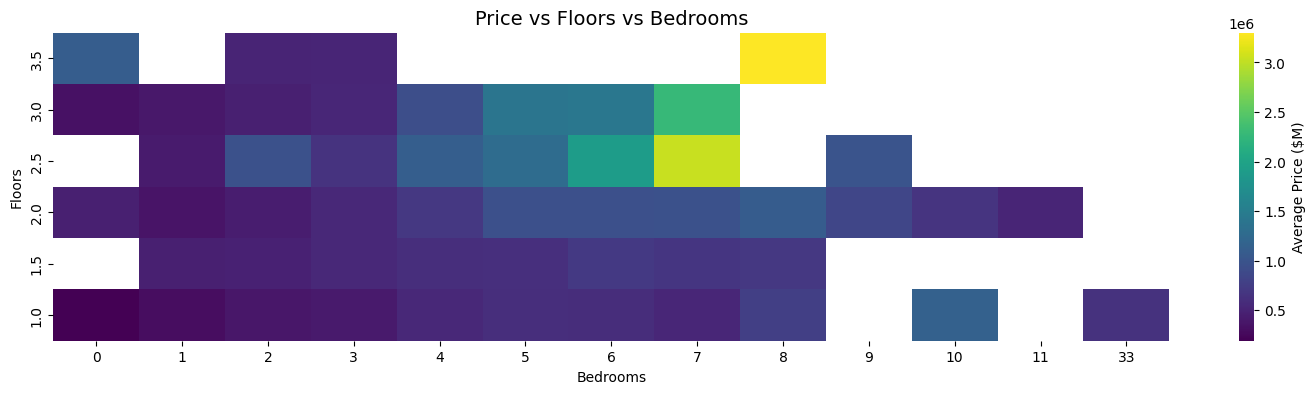

In [195]:
heatmap_data = king_county_houses1.pivot_table(
    index='floors',
    columns='bedrooms',
    values='price',
    aggfunc='mean'
)

# Sort floors ascending
heatmap_data = heatmap_data.sort_index(ascending=True)

plt.figure(figsize=(18,4))
sns.heatmap(
    heatmap_data,
    cmap='viridis',
    annot=False,
    cbar_kws={'label': 'Average Price ($M)'}
)

plt.title('Price vs Floors vs Bedrooms', fontsize=14)
plt.xlabel('Bedrooms')
plt.ylabel('Floors')

# ✅ Fix the upside-down y-axis
plt.gca().invert_yaxis()

plt.show()

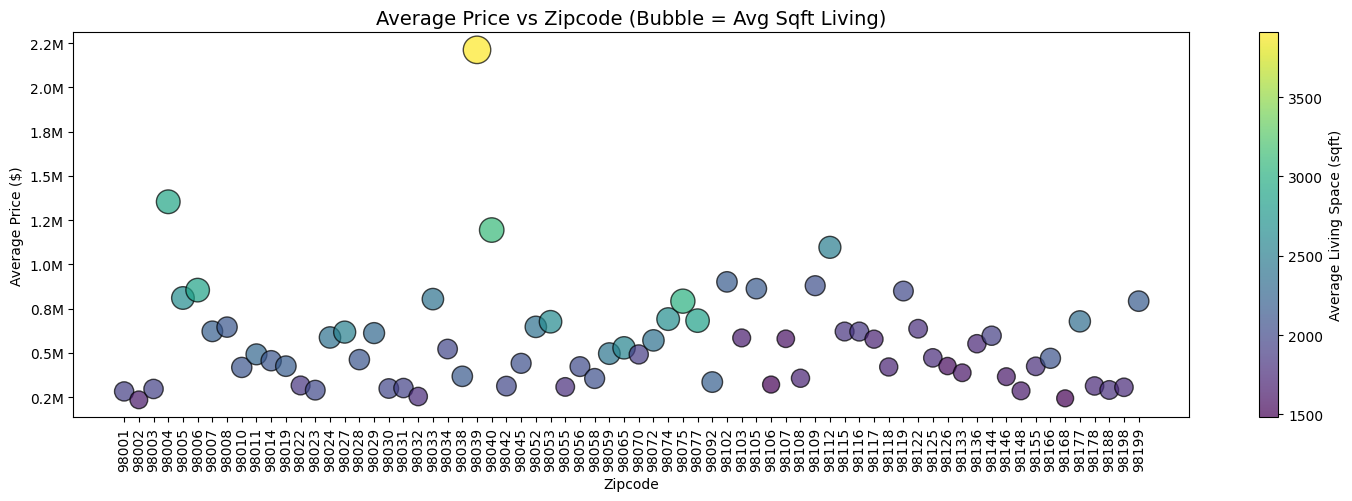

In [198]:
zipcode_summary = (
    king_county_houses1
    .groupby('zipcode')
    .agg(
        avg_price=('price', 'mean'),
        avg_sqft=('sqft_living', 'mean'),
        house_count=('id', 'count')
    )
    .reset_index()
)

plt.figure(figsize=(18,5))
plt.scatter(
    x=zipcode_summary['zipcode'],
    y=zipcode_summary['avg_price'],
    s=zipcode_summary['avg_sqft'] / 10,   # bubble size = avg sqft (scaled)
    c=zipcode_summary['avg_sqft'],        # bubble color = avg sqft
    cmap='viridis',
    alpha=0.7,
    edgecolor='k'
)

plt.title('Average Price vs Zipcode (Bubble = Avg Sqft Living)', fontsize=14)
plt.xlabel('Zipcode')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.colorbar(label='Average Living Space (sqft)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))

plt.show()


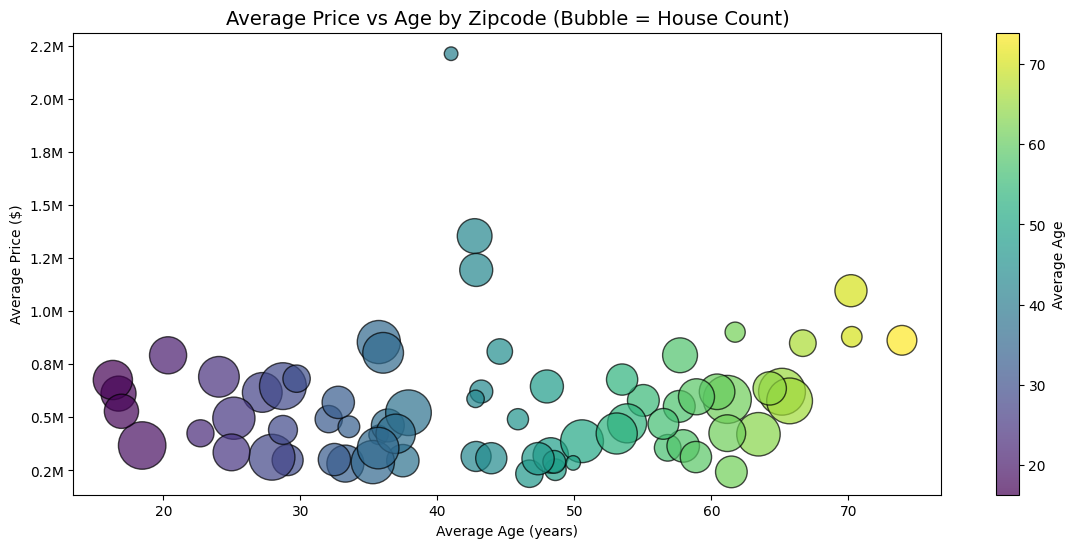

In [207]:
zipcode_age_price = (
    king_county_houses1.groupby('zipcode')
    .agg(avg_price=('price', 'mean'), avg_age=('house_age', 'mean'), count=('id', 'count'))
    .reset_index()
)

plt.figure(figsize=(14,6))
plt.scatter(
    x=zipcode_age_price['avg_age'],
    y=zipcode_age_price['avg_price'],
    s=zipcode_age_price['count'] * 2,
    c=zipcode_age_price['avg_age'],
    cmap='viridis',
    alpha=0.7,
    edgecolor='k'
)
plt.title('Average Price vs Age by Zipcode (Bubble = House Count)', fontsize=14)
plt.xlabel('Average Age (years)')
plt.ylabel('Average Price ($)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.colorbar(label='Average Age')
plt.show()


### Multivariate
- Price, Renovated/not renovated, Age
- Price, Renovated/not renovated, Grade
- Price vs Sqft Living vs Bedrooms
- Price vs Grade vs Condition
- Price vs Floors vs Bedrooms
- Zipcode vs Price vs Avg Sqft Living
- Zipcode vs Grade vs Condition
- Latitude vs Longitude vs Price
- Zipcode vs Price vs Waterfront
- Price vs Sqft Basement vs Condition
- Price vs Zipcode vs Grade
- Price vs Sqft Living vs Grade
- Price vs Zipcode vs Waterfront
- Price vs View vs Condition
- Age, Price, and Zipcode
- Age, Condition, and Price
- Age, Renovation, and Condition
- Age, Price, and View



/var/folders/b7/64294z_j16d0t1nszkgct6_c0000gn/T/ipykernel_93370/921001136.py:4: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



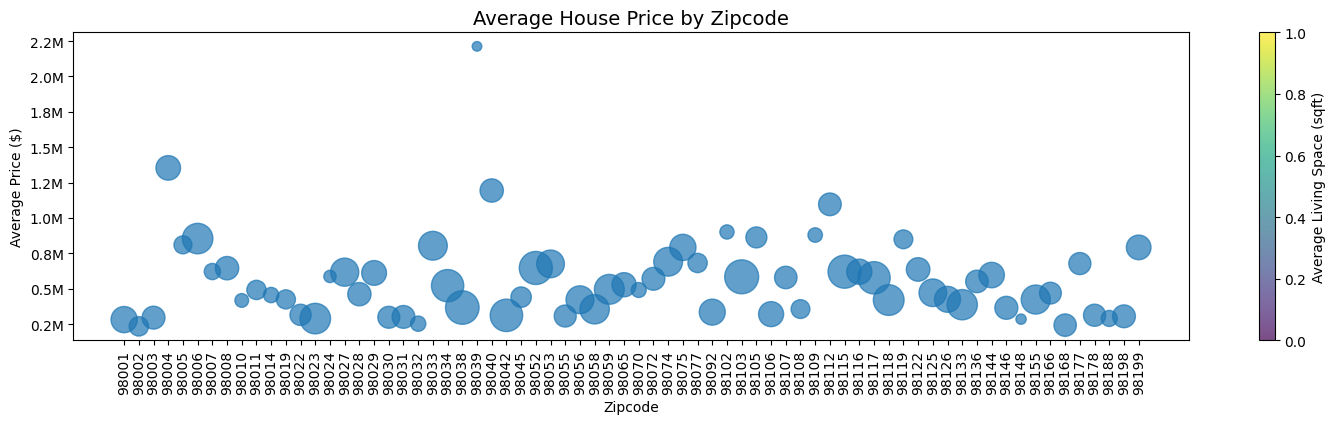

In [ ]:
zipcode_summary = (king_county_houses1.groupby('zipcode').agg(avg_price=('price', 'mean'),house_count=('id', 'count'),avg_sqft=('sqft_living', 'mean')).reset_index())

plt.figure(figsize=(18,4))
plt.scatter(
    x=zipcode_summary['zipcode'],
    y=zipcode_summary['avg_price'],
    s=zipcode_summary['house_count'],   
    # c=zipcode_summary['avg_sqft'],         
    cmap='viridis',
    alpha=0.7
)

plt.title('Average House Price by Zipcode', fontsize=14)
plt.xlabel('Zipcode')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.colorbar(label='Average Living Space (sqft)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.show()

In [62]:
zipcode_summary = king_county_houses1.groupby('zipcode')['price'].mean().reset_index()

fig = px.scatter(
    zipcode_summary,
    x='zipcode',
    y='price',
    size='price',
    color='price',
    color_continuous_scale='Viridis',
    title='Average House Price by Zipcode',
)

fig.update_traces(marker=dict(opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(
    xaxis=dict(type='category', tickangle=90, tickmode='linear'),
    width=1000,
    height=600
)
fig.show()

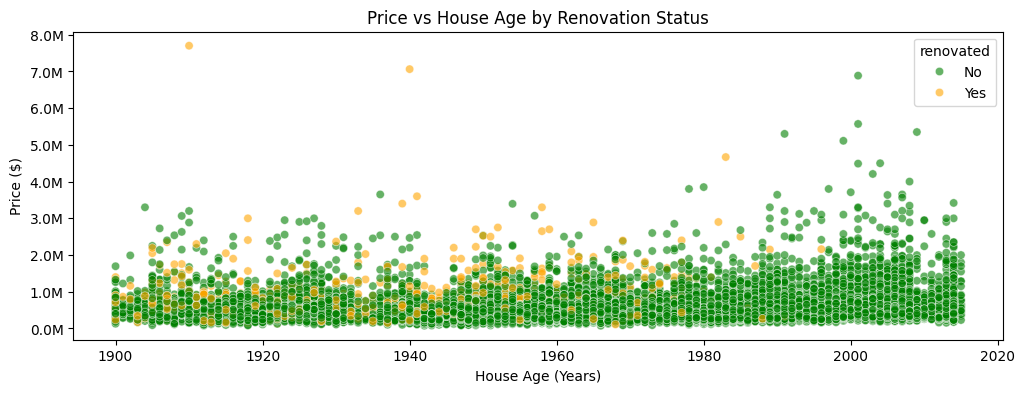

In [146]:
plt.figure(figsize=(12,4))
sns.scatterplot(
    data=king_county_houses1,
    x='yr_built',
    y='price',
    hue='renovated',
    alpha=0.6,
    palette=['green','orange']
)
plt.title('Price vs House Age by Renovation Status')
plt.xlabel('House Age (Years)')
plt.ylabel('Price ($)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.show()

/var/folders/b7/64294z_j16d0t1nszkgct6_c0000gn/T/ipykernel_93370/909377444.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




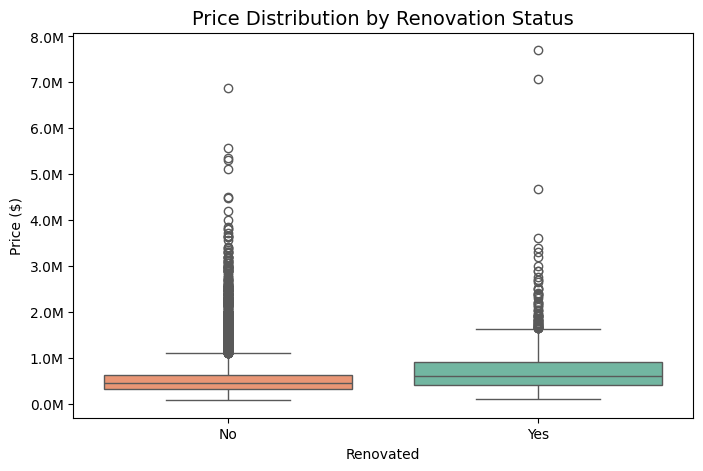

In [148]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=king_county_houses1,
    x='renovated',
    y='price',
    palette=['#fc8d62', '#66c2a5']
)
plt.title('Price Distribution by Renovation Status', fontsize=14)
plt.xlabel('Renovated')
plt.ylabel('Price ($)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.show()

/var/folders/b7/64294z_j16d0t1nszkgct6_c0000gn/T/ipykernel_93370/415415160.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




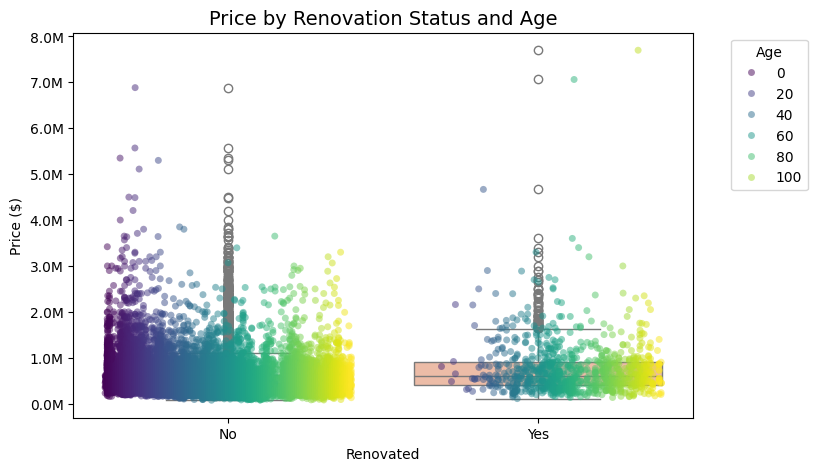

In [150]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=king_county_houses1,
    x='renovated',
    y='price',
    palette='coolwarm'
)
sns.stripplot(
    data=king_county_houses1,
    x='renovated',
    y='price',
    hue='house_age',
    palette='viridis',
    alpha=0.5,
    dodge=True
)
plt.title('Price by Renovation Status and Age', fontsize=14)
plt.xlabel('Renovated')
plt.ylabel('Price ($)')
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.show()

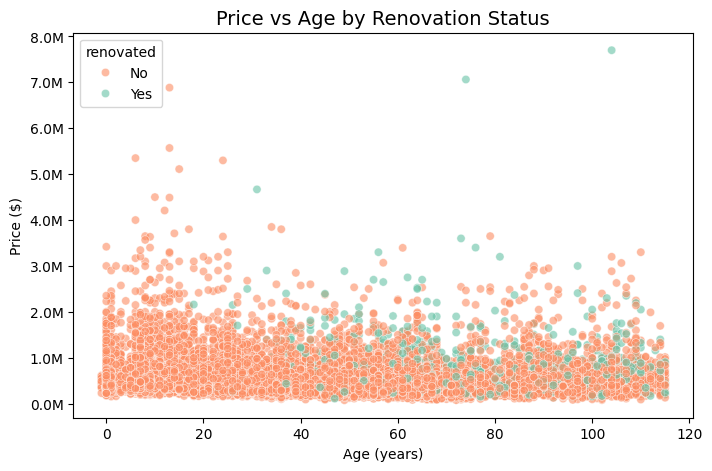

In [152]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=king_county_houses1,
    x='house_age',
    y='price',
    hue='renovated',
    alpha=0.6,
    palette=['#fc8d62', '#66c2a5']
)
plt.title('Price vs Age by Renovation Status', fontsize=14)
plt.xlabel('Age (years)')
plt.ylabel('Price ($)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.show()